### Polynomial Regresssion

Procedure is same as multiple linear regression. Extra columns (polynomial features) added to feature matrix.

Example: If we have one feature and specify degree as 2. 
Feature matrix = [1, X, X^2]

Example: If we have two features and specify degree as 2.
Feature matrix = [1, X1, X2, X1X2, X1^2, X2^2]

#### 1. Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function to read data and get features and labels
# arguments: file name and split ratio
# return values: features and labels of train and test
def readData (file, train):
    data = pd.read_csv (file)
    trainsize = int (0.8 * len (data))
    trainData = data.iloc [:trainsize, :].values
    testData = data.iloc [trainsize:, :].values
    return trainData [:, :-1], trainData [:, -1], testData [:, :-1], testData [:, -1]    

In [3]:
# function to normalize data
# arguments: data
# return values: normalized data
def normalize (data):
    mins = np.min (data, axis = 0)
    maxs = np.max (data, axis = 0)
    return (data - mins)/ (maxs- mins)

In [4]:
# function to get polynomial features
# arguments: trainX, testX
# return values: polynomial trainX and testX
def getPolynomials (trainX, testX, degree = 3):
    features = np.append (trainX, testX)
    features = features.reshape (len (features), 1)
    for i in range (2, degree + 1):
        features = np.append (features, features [:, 0].reshape (len (features [:, 0]), 1) ** i, axis = 1)
    features = normalize (features)
    features = np.append (features, np.ones ((features.shape [0], 1)), axis = 1)
    return features [:len (trainX), ], features [len (trainX):, ]

In [5]:
# forward pass
# arguments: features, weights matrix - last term is bias
# return values: X * weights
def forwardPass (X, weights):
    return np.dot (X, weights)

In [6]:
# cost function - mean squared error
# arguments: predicted values of y, actual y
# return values: cost
def costCalculator (yhat, Y):
    return (1/ (2 * len (yhat))) * np.sum ((yhat - Y) ** 2)

In [7]:
# gradient descent algorithm
# arguments: X, Y, learning rate and iterations
# return value: weight and costs
def gradientDescent (X, Y, learningRate, iterations):
    weights = np.zeros ([X.shape [1]])
    costs = []
    for _ in range (iterations):
        yhat = forwardPass (X, weights)
        cost = costCalculator (yhat, Y)
        costs.append (cost)
        weights = weights - ((learningRate/ len (X)) * np.dot ((yhat - Y), X))
    return weights, costs

In [8]:
def plotLinearReg (X, Y, polyX, weight):
    yhat = forwardPass (polyX, weight)
    plt.scatter (X, Y)
    plt.plot (X, yhat)
    plt.xlabel ('Experience in years')
    plt.ylabel ('Salary')
    plt.show ()

In [9]:
def main (file, split = 0.8, learningRate = 0.1, iterations = 10000, degree = 3):
    trainX, trainY, testX, testY = readData (file, split)
    polyTrainX, polyTestX = getPolynomials (trainX, testX, degree)
    weights, costs = gradientDescent (polyTrainX, trainY, learningRate, iterations)
    
    # last value is the bias
    print  ("Weights: "  + str (weights))
    
    # calculate the cost on trained data
    numpyModelCost = costCalculator (forwardPass (polyTrainX, weights), trainY)
    print ("Cost: " + str (numpyModelCost))
    
    # calculate the cost on test data
    numpyModelCostTest = costCalculator (forwardPass (polyTestX, weights), testY)
    print ("Cost: " + str (numpyModelCostTest))
    
    plotLinearReg (trainX, trainY, polyTrainX, weights)

Weights: [52480.50169214 37392.55867785 21826.51310604 39277.49974314]
Cost: 14309531.323900724
Cost: 221655542.70679176


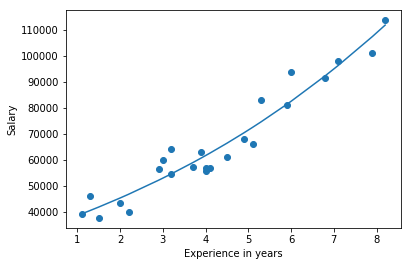

In [10]:
# degree of polynomial is 3
main ('./Data/Salary_Data.csv')

Weights: [94496.18997408 34717.91345724]
Cost: 17558124.90404492
Cost: 17883369.11982337


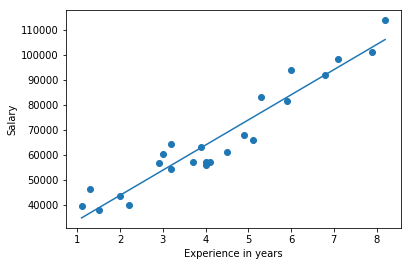

In [11]:
# degree of polynomial is 1 - linear regression
main ('./Data/Salary_Data.csv', degree = 1)

#### 2. Scikit-learn

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [13]:
def buildPolynomial (degree):
    
    poly = PolynomialFeatures (degree = degree)
    polyTrain = poly.fit_transform (trainX)
    polyTest = poly.transform (testX)
    
    clf = linear_model.LinearRegression ()
    clf.fit (polyTrain, trainY)
    
    trainEstimate = clf.predict (polyTrain)
    testEstimate = clf.predict (polyTest)
    
    sklearnTrainCost = costCalculator (trainEstimate, trainY)
    print ('Train data cost: ' + str (sklearnTrainCost))
    
    sklearnTestCost = costCalculator (testEstimate, testY)
    print ('Test data cost: ' + str (sklearnTestCost))
    
    plt.scatter (trainX, trainY)
    plt.plot (trainX, trainEstimate)
    plt.xlabel ('Experience in years')
    plt.ylabel ('Salary')
    plt.show ()

In [14]:
trainX, trainY, testX, testY = readData ('./Data/Salary_Data.csv', 0.8)

Train data cost: 17558124.90404492
Test data cost: 17883369.11982905


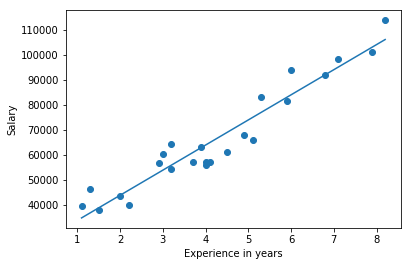

In [15]:
buildPolynomial (1)

Train data cost: 14235408.240632037
Test data cost: 187565839.2193752


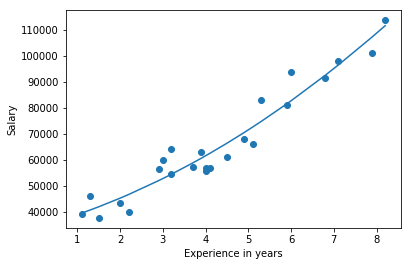

In [16]:
buildPolynomial (2)

Train data cost: 14137704.439064339
Test data cost: 95555567.62788993


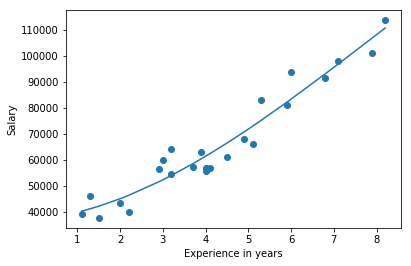

In [17]:
buildPolynomial (3)

Train data cost: 13828166.509523163
Test data cost: 140396344.9470493


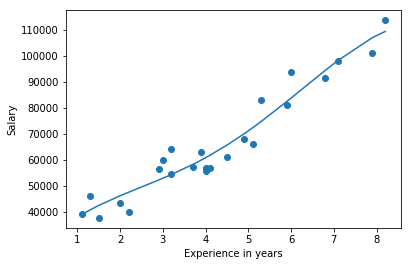

In [18]:
buildPolynomial (4)

Train data cost: 13824488.713235915
Test data cost: 39849839.90078214


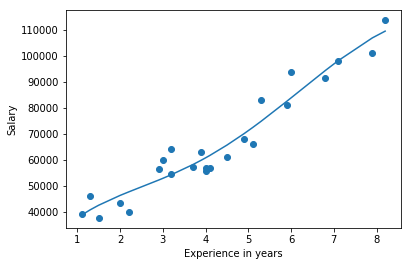

In [19]:
buildPolynomial (5)

Train data cost: 8875051.307094648
Test data cost: 448253561064.4772


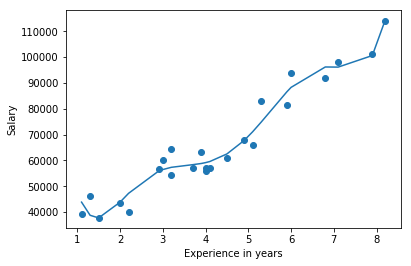

In [20]:
buildPolynomial (6)

Train data cost: 5904072.066306112
Test data cost: 312925051425765.5


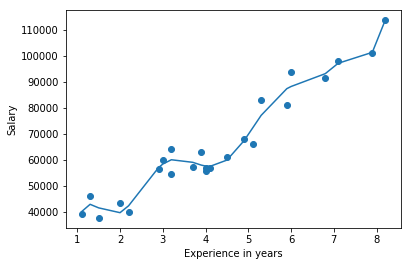

In [21]:
buildPolynomial (10)

Train data cost: 44658767.88239469
Test data cost: 1.2360651597096038e+35


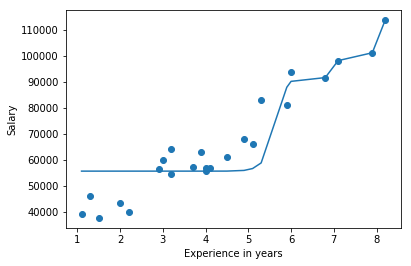

In [22]:
buildPolynomial (50)